# Analyzing discourse around climate change on Reddit over time

Dataset: https://www.kaggle.com/datasets/pavellexyr/the-reddit-climate-change-dataset

## Preprocessing

In [16]:
import pandas as pd
post_data = pd.read_csv("the-reddit-climate-change-dataset-posts.csv")

#remove irrelevant columns
post_data = post_data.drop(columns=["type", "id", "subreddit.id", "permalink", "domain", "url"])

#add column of time in readable format
import datetime
post_data["time_readable"] = post_data["created_utc"].apply(lambda x: str(datetime.datetime.fromtimestamp(x))[:10])

post_data.head()

,subreddit.name,subreddit.nsfw,created_utc,selftext,title,score,time_readable
0,democraticsocialism,False,1661990237,NaN,“Cities without water” is our future. The lead...,15,2022-09-01
1,nostupidquestions,False,1661990182,Ok so I was having a conversation with my neig...,Sharks and climate change,2,2022-09-01
2,eduwriters,False,1661990150,NaN,How to start a climate change essay,1,2022-09-01
3,alternatitvereality,False,1661989389,NaN,Ever notice that when it’s hot a few days in J...,1,2022-09-01
4,askreddit,False,1661989240,[deleted],How would you react if the next American presi...,1,2022-09-01


## General trends

### Post volume

In [17]:
#create row of month post was made
post_data["month"] = post_data["time_readable"].apply(lambda x: x[:7])

#count posts per month
unique_months = sorted(post_data["month"].unique())
month_counts = {month:len(post_data[post_data["month"]==month]) for month in unique_months}

In [18]:
from statistics import mean
print("The average month had {} posts".format(round(mean(list(month_counts.values())))))

The average month had 4058 posts


Text(0, 0.5, 'Number of Reddit Posts')

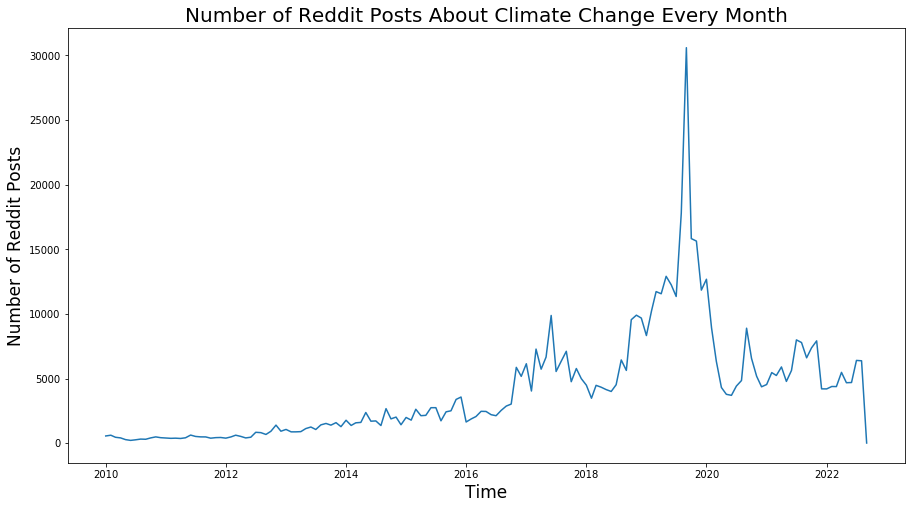

In [19]:
#posts per month 
import numpy as np
import matplotlib.pyplot as plt

month_datetimes = pd.to_datetime(unique_months)
month_counts_list = [x for x in month_counts.values()]
plt.figure(figsize=(15,8))
plt.plot(month_datetimes, month_counts_list)
plt.title("Number of Reddit Posts About Climate Change Every Month", fontsize=20)
plt.xlabel("Time", fontsize=17)
plt.ylabel("Number of Reddit Posts", fontsize=17)

#### What was the spike?

In [20]:
for n in month_counts.keys():
    if month_counts[n] == max(month_counts.values()):
        print("{} had the highest number of posts: {}".format(n, month_counts[n]))

2019-09 had the highest number of posts: 30602


In [60]:
#How does it compare to other spikes?
top_10_biggest_spikes=list(reversed(sorted(month_counts.values())))[:10]
print(top_10_biggest_spikes)

[30602, 17799, 15827, 15636, 12909, 12682, 12250, 11841, 11726, 11559]


There was a large spike in post volume in September 2019. This is the month that the month that the UN Climate Action Summit took place, as well as the three days of international climate strikes preceding the event. The wildfires in Brazil were also ongoing at this time.

This was the period with the most climate change-related discourse on Reddit by a wide margin—1.7x as high as the second-highest month and more than 7x as high as the average month. 

### Sentiment

I used the Valence Aware Dictionary and sEntiment Reasoner (VADER), a sentiment analysis package designed to evaluate sentiments of social media posts. VADER calculates four scores for each piece of text, which describe the amount of negative sentiment, positive sentiment, and neutral sentiment in the post, as well as a compound score summarizing all three scores. For simplicity, I decided to use only the compound score, and evaluate only the sentiment of the post title (since some posts lack body text). Compound scores lie on a scale from -1 to +1, where scores of -0.05 or below indicate a negative sentiment, scores between -0.05 and 0.05 indicate neutral sentiment, and scores of 0.05 or above indicate positive sentiment. 

In [22]:
#add a column with sentiment of titles (using titles because not all posts have body text)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

post_data["sentiment"] = post_data["title"].apply(lambda x: sentiment.polarity_scores(x)["compound"])

post_data.head()

,subreddit.name,subreddit.nsfw,created_utc,selftext,title,score,time_readable,month,sentiment
0,democraticsocialism,False,1661990237,NaN,“Cities without water” is our future. The lead...,15,2022-09-01,2022-09,-0.6908
1,nostupidquestions,False,1661990182,Ok so I was having a conversation with my neig...,Sharks and climate change,2,2022-09-01,2022-09,0.0000
2,eduwriters,False,1661990150,NaN,How to start a climate change essay,1,2022-09-01,2022-09,0.0000
3,alternatitvereality,False,1661989389,NaN,Ever notice that when it’s hot a few days in J...,1,2022-09-01,2022-09,0.1655
4,askreddit,False,1661989240,[deleted],How would you react if the next American presi...,1,2022-09-01,2022-09,-0.1531


In [23]:
from statistics import mean
print("The average sentiment is {}".format(mean(post_data["sentiment"])))

The average sentiment is -0.07995127490707157


Text(0, 0.5, 'Number of posts')

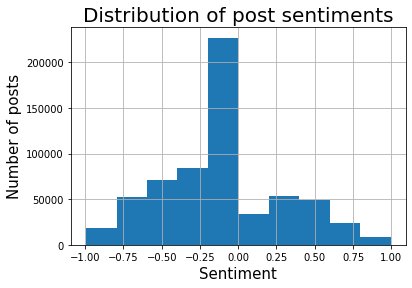

In [24]:
#histogram of sentiments of all posts
pd.Series(post_data["sentiment"]).hist()
plt.title("Distribution of post sentiments", fontsize=20)
plt.xlabel("Sentiment", fontsize=15)
plt.ylabel("Number of posts", fontsize=15)

A large majority of posts have a negative sentiment, and large plurality have a sentiment between -0.25 and 0. 

#### Sentiment over time

In [25]:
#plot mean sentiment for each month
mean_sentiment = {}
for month in unique_months:
    mean_sentiment[month]=mean(post_data.loc[post_data["month"]==month]["sentiment"])

Text(0, 0.5, 'Average Sentiment of Reddit Posts')

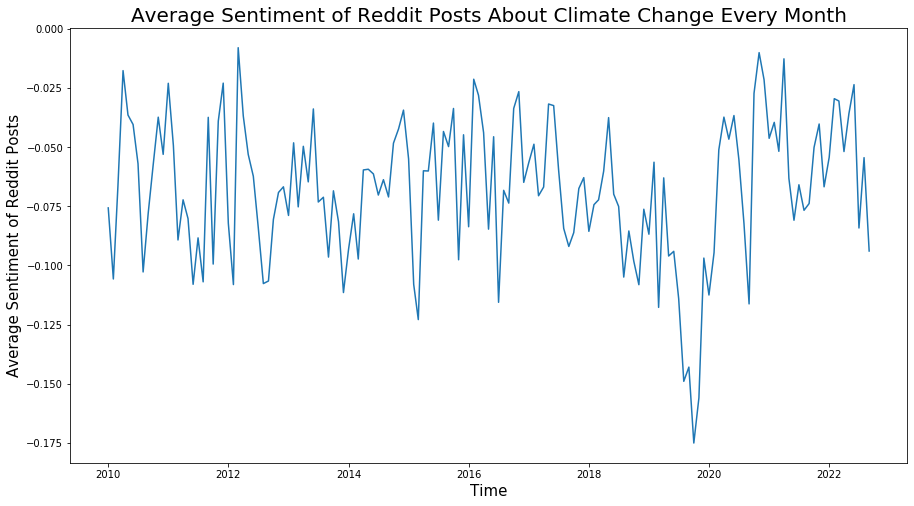

In [26]:
#sentiment per month
month_sentiments_list = [x for x in mean_sentiment.values()]
plt.figure(figsize=(15,8))
plt.plot(month_datetimes, month_sentiments_list)
plt.title("Average Sentiment of Reddit Posts About Climate Change Every Month", fontsize=20)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Average Sentiment of Reddit Posts", fontsize=15)

Every month in the dataset has a slightly negative average sentiment, with an average of -0.078, becoming neither significantly more positive nor significantly more negative over time. 

#### What was the month with lowest sentiment?

In [27]:
for n in mean_sentiment.keys():
    if mean_sentiment[n] == min(mean_sentiment.values()):
        print("{} had the lowest sentiment: {}".format(n, round(min(mean_sentiment.values()),3)))

2019-10 had the lowest sentiment: -0.175


Again, there is a notable spike in September 2019, with the most negative average sentiment of -0.14.

### Sentiment during important events

Since most of these events did not take place on a single day but rather lasted for an extended period, I evaluated the month in which each event took place.

The positive events were the signing of the Paris Agreement (December 2015), the 2019 UN Climate Action Summit (September 2019), and the signing of Joe Biden's historic climate change treaty (August 2022). 

The negative events were the 2018 IPCC report that announced the drastic action needed by 2030 to stay below 1.5ºC (October 2018) and three of the most widely reported climate change-related natural disasters of the past decade: the Brazilian wildfires in August 2019, the Californian wildfires in August 2020, and the Australian wildfires in January 2020. For these wildfires, I chose the month where press coverage peaked as per Google Trends. 

In [28]:
#dict of relevant events
events = {"California Wildfire": "2020-08",
         "Australia Wildfire": "2020-01",
         "Brazil Wildfire": "2019-08",
         "IPCC 2018": "2018-10",
         "Biden deal": "2022-08",
         "Paris Agreement": "2022-08",
         "UN Summit": "2019-09"}

bad_events = [event for event in list(events.keys())[:4]]
good_events = [event for event in list(events.keys())[4:]]

#### Positive events

In [30]:
from statistics import mean
good_means = []
for event in good_events:
    print("{}: {}".format(event, round(mean(post_data.loc[post_data["month"]==events[event]]["sentiment"]), 3)))
    good_means.append(mean(post_data.loc[post_data["month"]==events[event]]["sentiment"]))
print("Mean:", round(mean(good_means), 3))

Biden deal: -0.054
Paris Agreement: -0.054
UN Summit: -0.143
Mean: -0.084


#### Negative events

In [31]:
bad_means = []
for event in bad_events:
    print("{}: {}".format(event, round(mean(post_data.loc[post_data["month"]==events[event]]["sentiment"]), 3)))
    bad_means.append(mean(post_data.loc[post_data["month"]==events[event]]["sentiment"]))
print("Mean:", round(mean(bad_means), 3))

California Wildfire: -0.082
Australia Wildfire: -0.112
Brazil Wildfire: -0.149
IPCC 2018: -0.098
Mean: -0.11


([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text xticklabel objects>)

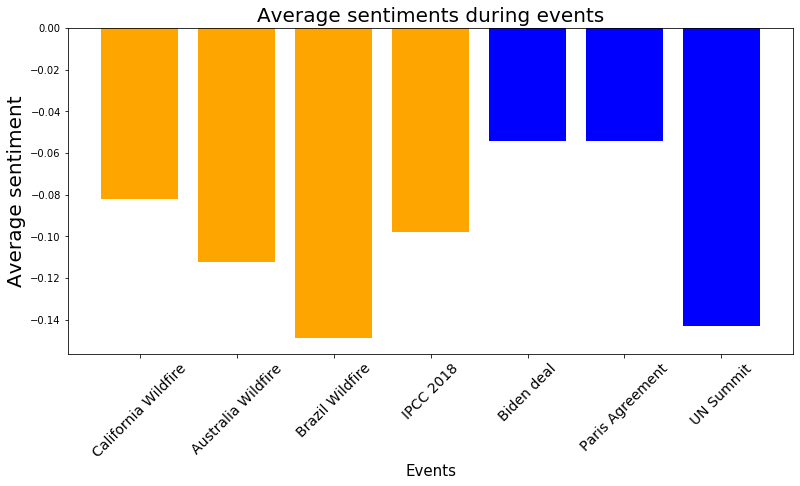

In [32]:
all_means = bad_means+good_means
plt.figure(figsize=(13,6))
plt.bar(list(events.keys()), all_means, color=['orange', 'orange', 'orange', 'orange', 'blue', "blue", "blue"])
plt.title("Average sentiments during events", fontsize=20)
plt.xlabel("Events", fontsize=15)
plt.ylabel("Average sentiment", fontsize=20)
plt.xticks(rotation=45,fontsize=14)

The average sentiment of posts during positive events was -0.084, and the mean sentiment during negative events was -0.11. In other words, sentiment was still negative when progress was occurring, but it was usually more negative when there were negative developments. 

### Posting volume during important events

#### Positive events

In [33]:
from statistics import median
sums = []
for event in good_events:
    print("{}: {}".format(event, sum(post_data["month"]==events[event])))
    sums.append(sum(post_data["month"]==events[event]))
    
print("Mean:", round(mean(sums)))
print("Sum:", round(sum(sums)))

Biden deal: 6372
Paris Agreement: 6372
UN Summit: 30602
Mean: 14449
Sum: 43346


In [34]:
sums = []
for event in bad_events:
    print("{}: {}".format(event, sum(post_data["month"]==events[event])))
    sums.append(sum(post_data["month"]==events[event]))
    
print("Mean:", round(mean(sums)))
print("Sum:", round(sum(sums)))

California Wildfire: 4843
Australia Wildfire: 12682
Brazil Wildfire: 17799
IPCC 2018: 9552
Mean: 11219
Sum: 44876


The months in which major positive and negative events took place had a similar average and total number of posts. However, this is largely because the month of the UN Summit had an extraordinarily high number of posts—as stated previously, it was the all-time highest by a wide margin. In the absence of this unusual event, the months in which negative events took place tended to have a higher number of posts. 

### Use of key words during major events

In [35]:
post_data["selftext"] = post_data["selftext"].apply(lambda x: str(x))

In [36]:
def count_word_month(word, month):
    #word in all caps, all lowercase, and word with only first letter capitalized
    words = [word.upper(), word.lower(), word[0].upper()+word[1:].lower()]
    
    #create list of all words in the titles of posts for a given month
    title_text = post_data.loc[post_data["month"]==month]["title"].to_list()
    title_list_of_words = []
    for title in title_text:
        split_title = title.split()
        for term in split_title:
            term = term.strip(",")
            title_list_of_words.append(term)

    #count instances of the 3 variations a given word in that list
    title_count = title_list_of_words.count(words[0]) + title_list_of_words.count(words[1]) + title_list_of_words.count(words[2])
    
    #create list of all words in the body text of posts for a given month
    body_text = post_data.loc[post_data["month"]==month]["selftext"].to_list()
    body_list_of_words = []
    for body in body_text:
        split_body = body.split()
        for term in split_body:
            term = term.strip(",")
            body_list_of_words.append(term)
            
    #count instances of the 3 variations a given word in that list
    body_count = body_list_of_words.count(words[0]) + body_list_of_words.count(words[1]) + body_list_of_words.count(words[2])

    #return sum
    return title_count + body_count

### Positive keywords

In [61]:
good_keywords = ["vote", "election", "hope", "optimistic", "inspired", "policies"]
for keyword in good_keywords:
    good_count = []
    bad_count = []
    
    print(keyword)
    for event in events.keys():
        print("{}: {}".format(event, count_word_month(keyword, events[event])))
        if event in good_events:
            good_count.append(count_word_month(keyword, events[event]))
        elif event in bad_events:
            bad_count.append(count_word_month(keyword, events[event]))
        
    print("Mean for good events:", round(mean(good_count), 3))
    print("Mean for bad events:", round(mean(bad_count), 3))
    
    print("")

vote
California Wildfire: 20
Australia Wildfire: 68
Brazil Wildfire: 81
IPCC 2018: 49
Biden deal: 40
Paris Agreement: 40
UN Summit: 69
Mean for good events: 49.667
Mean for bad events: 54.5

election
California Wildfire: 13
Australia Wildfire: 36
Brazil Wildfire: 121
IPCC 2018: 55
Biden deal: 8
Paris Agreement: 8
UN Summit: 37
Mean for good events: 17.667
Mean for bad events: 56.25

hope
California Wildfire: 36
Australia Wildfire: 101
Brazil Wildfire: 75
IPCC 2018: 105
Biden deal: 22
Paris Agreement: 22
UN Summit: 89
Mean for good events: 44.333
Mean for bad events: 79.25

optimistic
California Wildfire: 2
Australia Wildfire: 4
Brazil Wildfire: 14
IPCC 2018: 25
Biden deal: 5
Paris Agreement: 5
UN Summit: 10
Mean for good events: 6.667
Mean for bad events: 11.25

inspired
California Wildfire: 4
Australia Wildfire: 11
Brazil Wildfire: 11
IPCC 2018: 4
Biden deal: 2
Paris Agreement: 2
UN Summit: 29
Mean for good events: 11
Mean for bad events: 7.5

policies
California Wildfire: 26
Australi

#### Negative keywords

In [52]:
bad_keywords = ["doomed",  "hopeless", "late", "pointless", "depressed", "impossible", "insufficient"]
for keyword in bad_keywords:
    good_count = []
    bad_count = []
    
    print(keyword)
    for event in events.keys():
        print("{}: {}".format(event, count_word_month(keyword, events[event])))
        if event in good_events:
            good_count.append(count_word_month(keyword, events[event]))
        elif event in bad_events:
            bad_count.append(count_word_month(keyword, events[event]))
        
    print("Mean for good events:", round(mean(good_count), 3))
    print("Mean for bad events:", round(mean(bad_count), 3))
    
    print("")

doomed
California Wildfire: 1
Australia Wildfire: 5
Brazil Wildfire: 11
IPCC 2018: 22
Biden deal: 5
Paris Agreement: 5
UN Summit: 12
Mean for good events: 7.333
Mean for bad events: 9.75

hopeless
California Wildfire: 0
Australia Wildfire: 10
Brazil Wildfire: 25
IPCC 2018: 4
Biden deal: 0
Paris Agreement: 0
UN Summit: 31
Mean for good events: 10.333
Mean for bad events: 9.75

late
California Wildfire: 25
Australia Wildfire: 38
Brazil Wildfire: 93
IPCC 2018: 24
Biden deal: 14
Paris Agreement: 14
UN Summit: 122
Mean for good events: 50
Mean for bad events: 45

pointless
California Wildfire: 4
Australia Wildfire: 6
Brazil Wildfire: 0
IPCC 2018: 4
Biden deal: 2
Paris Agreement: 2
UN Summit: 7
Mean for good events: 3.667
Mean for bad events: 3.5

depressed
California Wildfire: 0
Australia Wildfire: 1
Brazil Wildfire: 8
IPCC 2018: 7
Biden deal: 14
Paris Agreement: 14
UN Summit: 1
Mean for good events: 9.667
Mean for bad events: 4

impossible
California Wildfire: 5
Australia Wildfire: 18
Braz

#### Visualization

In [62]:
labels = good_keywords+bad_keywords

In [63]:
means_good_events = []
means_bad_events = []

for keyword in labels:
    good_count = []
    bad_count = []
    
    for event in good_events:
        good_count.append(count_word_month(keyword, events[event]))
    
    for event in bad_events:
        bad_count.append(count_word_month(keyword, events[event]))
    
    means_bad_events.append(mean(bad_count))
    means_good_events.append(mean(good_count))

Text(0.5, 0, 'Keywords')

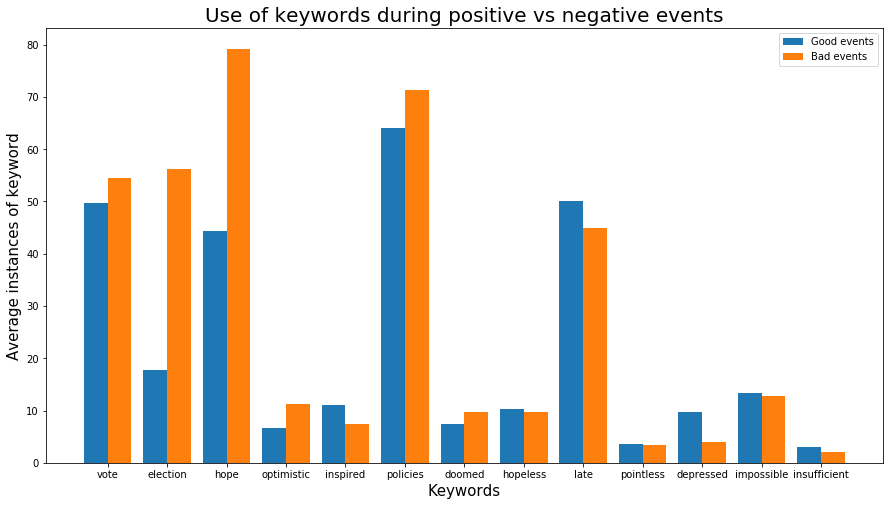

In [64]:
x=np.arange(len(labels))
width = 0.40
plt.figure(figsize=(15,8))
plt.bar(x-0.2, means_good_events, width)
plt.bar(x+0.2, means_bad_events, width)
plt.xticks(x,labels)
plt.legend(["Good events", "Bad events"])
plt.title("Use of keywords during positive vs negative events", fontsize=20)
plt.ylabel("Average instances of keyword", fontsize=15)
plt.xlabel("Keywords", fontsize=15)

Negative keywords had a higher average incidence during negative events. The results for positive keywords were mixed—ordinary positive keywords like "optimistic" or "inspired" had a higher average incidence during positive events, but action-oriented keywords such as "election" or "policies" were used more during negative events. However, there is the obvious risk of an ongoing election confounding the results.

#### T-test

In [67]:
import scipy.stats as stats

good_events_good_keywords = means_good_events[:7]
bad_events_good_keywords = means_bad_events[:7]

t_statistic, p_value = stats.ttest_ind(a=good_events_good_keywords, b=bad_events_good_keywords)
print("Difference in positive keyword use")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Difference in positive keyword use
t-statistic: -0.8653905623250487
p-value: 0.40379387291407587


In [68]:
good_events_bad_keywords = means_good_events[7:]
bad_events_bad_keywords = means_bad_events[7:]

t_statistic, p_value = stats.ttest_ind(a=good_events_bad_keywords, b=bad_events_bad_keywords)
print("Difference in negative keyword use")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Difference in negative keyword use
t-statistic: 0.22124388064375786
p-value: 0.8293547794173511


Sadly, it seems like the difference in keyword use during positive and negative events was not statistically significant, but I would be curious to see whether this changes with a larger sample size as this one was clearly very small.